# Import Libraries

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
                                    LinearRegression, 
                                    Ridge,
                                    Lasso, 
                                    ElasticNet
                                    )

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import (
                                    GridSearchCV, 
                                    RandomizedSearchCV, 
                                    cross_val_score
                                    )
from skopt import BayesSearchCV

# Load Dataset

In [214]:
df = pd.read_csv("loans_preprocessed.csv")
df.head()

,selling_price,engine_CC,max_power_BHP,torque_Nm,age,bhp_to_engineCC_ratio,bhp_to_torque_rpm,price_to_km,price_to_owner_ratio,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,0.163902,0.186650,-0.211243,0.895601,0.036665,-0.710244,0.763555,-0.770632,0.029508,1,0,0,1,0,1
1,-0.218440,1.373051,1.661652,1.736419,0.036665,0.778783,1.141068,-0.771885,0.001110,1,0,0,1,0,1
2,-0.314026,0.737140,-0.649012,0.615328,1.013771,-2.243395,-0.010798,-0.665028,-0.443798,1,0,0,1,0,1
3,-1.030917,0.903236,-0.585568,0.475192,0.362367,-2.321700,0.510909,-1.023908,-1.153744,1,0,0,1,0,1
4,0.402866,1.197464,1.974435,1.708392,0.036665,1.556566,1.722754,-0.205520,0.739454,1,0,0,1,0,1


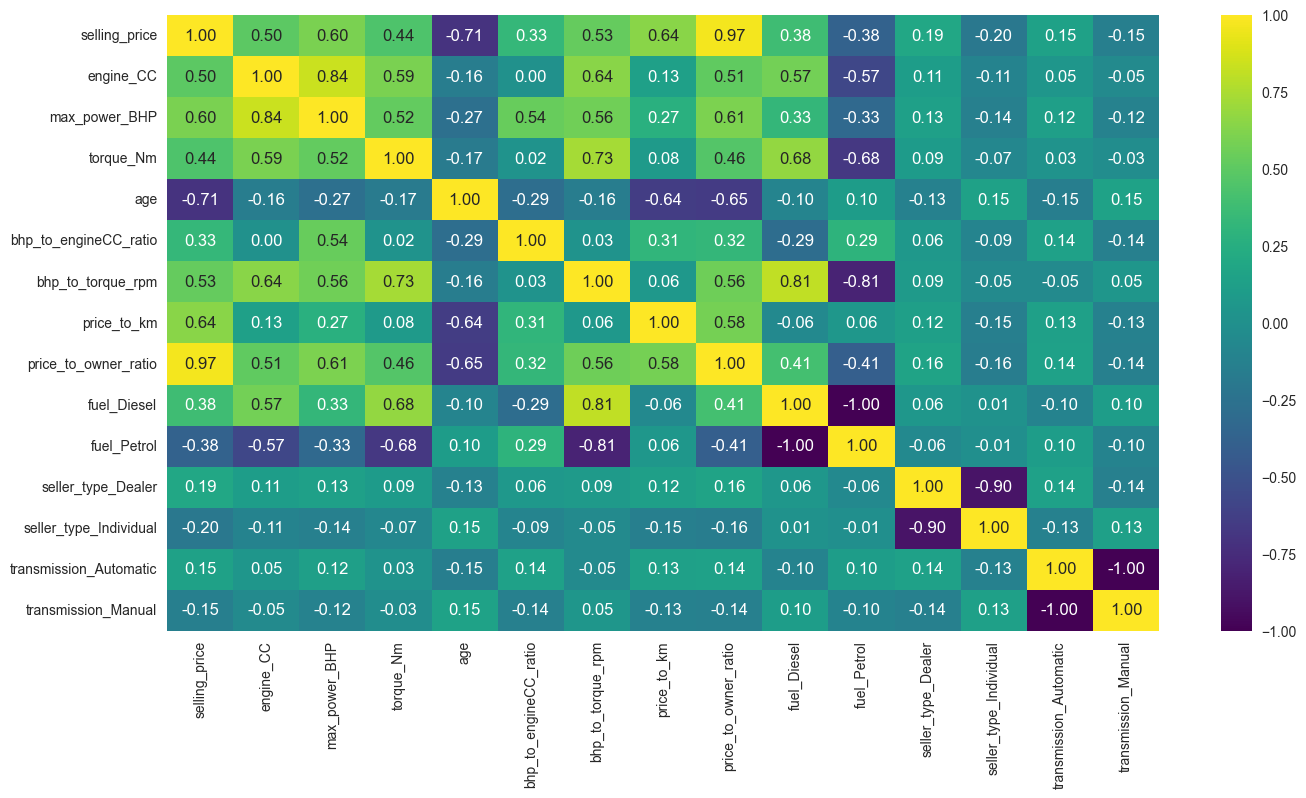

In [215]:
import seaborn as sns
import numpy as np
df_corr= df.corr(numeric_only=True)

plt.figure(figsize=(16, 8))
sns.heatmap(df_corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

# Single Variable LinearRegression

In [216]:
# مشخص کردن X, y
X = df[['price_to_owner_ratio']]
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
slr_model = LinearRegression()

# اموزش مدل
slr_model.fit(X_train, y_train)

# پیشبینی داده های اموزشی
y_pred = slr_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
score = slr_model.score(X, y)
mse = mean_squared_error(y_pred, y_test)

# Show Results
print(f"SLR MSE: {mse}")
print(f"SLR R-Squared: {r2}")
print(f"SLR Score: {score}")

SLR MSE: 0.07787556219962465
SLR R-Squared: 0.921700099975437
SLR Score: 0.9362473852918991


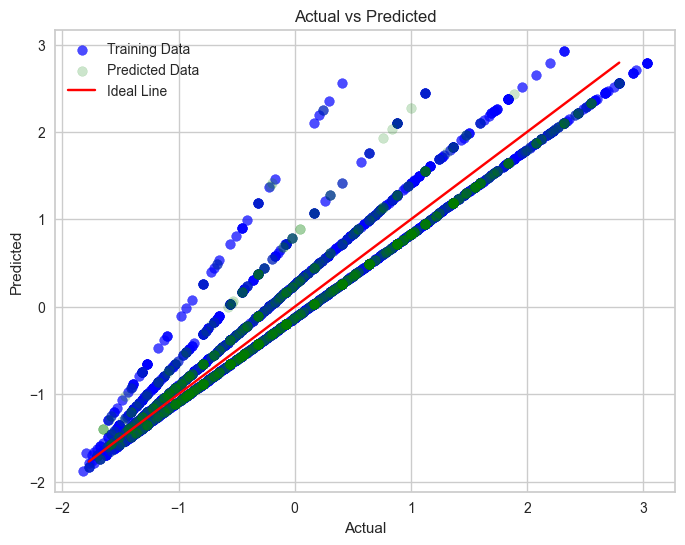

In [217]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, slr_model.predict(X_train), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.2, label='Predicted Data')

# خط مرجع
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Ideal Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


# Multi-Variable LinearRegression

In [218]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
mlr_model = LinearRegression()

# اموزش مدل
mlr_model.fit(X_train, y_train)

# پیشبینی داده های اموزشی
y_pred = mlr_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
score = mlr_model.score(X, y)
mse = mean_squared_error(y_pred, y_test)

# Show Results
print(f"MLR MSE: {mse}")
print(f"MLR R-Squared: {r2}")
print(f"MLR Score: {score}")

MLR MSE: 0.0568637394656748
MLR R-Squared: 0.9428264144819671
MLR Score: 0.952941213801499


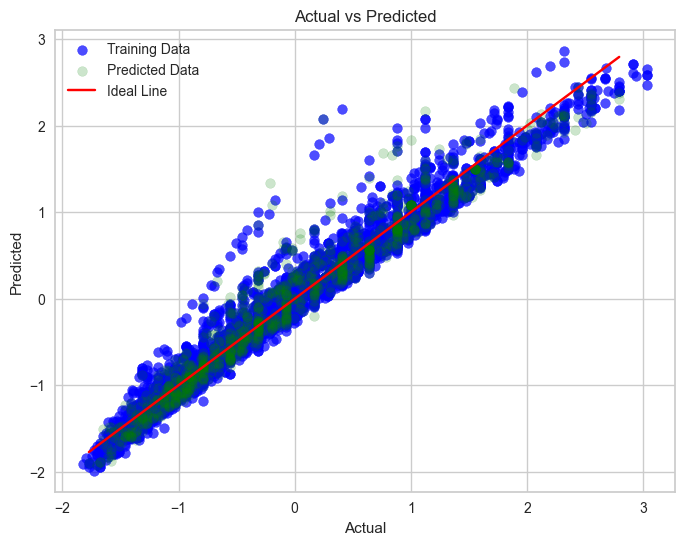

In [219]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, mlr_model.predict(X_train), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.2, label='Predicted Data')

# خط مرجع
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Ideal Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


# Polynomial Regression

In [220]:
X = df[['engine_CC', 'max_power_BHP', 'torque_Nm', 'age',
       'bhp_to_engineCC_ratio', 'bhp_to_torque_rpm', 'price_to_km',
       'price_to_owner_ratio', 'fuel_Diesel', 'fuel_Petrol']]
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
poly_model = LinearRegression()
pf = PolynomialFeatures(degree=3)

# تدبیل و اموزش داده های اموزشی
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

# اموزش مدل
poly_model.fit(X_train_poly, y_train)

# پیشبینی با مدل
y_pred = poly_model.predict(X_test_poly)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
score = poly_model.score(X_test_poly, y_test)
mse = mean_squared_error(y_pred, y_test)

# Show Results
print(f"Polynomial MSE: {mse}")
print(f"Polynomial R-Squared: {r2}")
print(f"Polynomial Score: {score}")


Polynomial MSE: 0.03795209292128328
Polynomial R-Squared: 0.9618411091037526
Polynomial Score: 0.9618411091037526


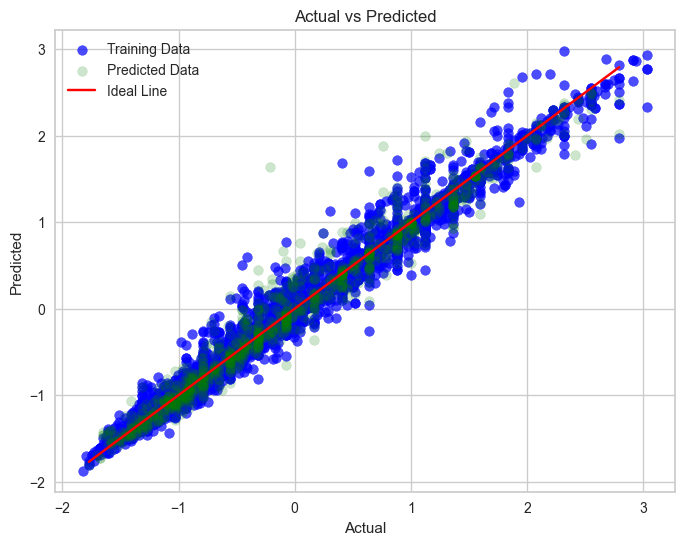

In [221]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, poly_model.predict(X_train_poly), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.2, label='Predicted Data')

# خط مرجع
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Ideal Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Ridge Regression

In [222]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
ridge_model = Ridge()

# اموزش مدل
ridge_model.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = ridge_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"Ridge MSE: {mse}")
print(f"Ridge R-Squared: {r2}")

Ridge MSE: 0.056861395246666335
Ridge R-Squared: 0.9428287714744409


### Ridge Regression Hyperparameter Optimization

In [223]:
ridge_model = Ridge()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

opt = BayesSearchCV(
                    estimator=ridge_model,
                    search_spaces=params,
                    n_iter=20,
                    cv=5,
                    verbose=1,
                    scoring="r2")

opt.fit(X_train, y_train)

print("Bayesian Optimization : \n===============================")
print("Best parameters:", opt.best_params_)
print("Best R2 Score:", opt.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Ridge Regression Tuned
ساخت مدل جدید بر اساس هایپرپارامتر مشخص شده در سلول قبل

In [224]:
# ایجاد شی جدید با هایپرپارمتر های مشخص شده
ridge_model_tuned = Ridge(alpha=0.3)

# اموزش مدل
ridge_model_tuned.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = ridge_model_tuned.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"Ridge MSE: {mse}")
print(f"Ridge R-Squared: {r2}")

Ridge MSE: 0.05686286799692104
Ridge R-Squared: 0.9428272906992856


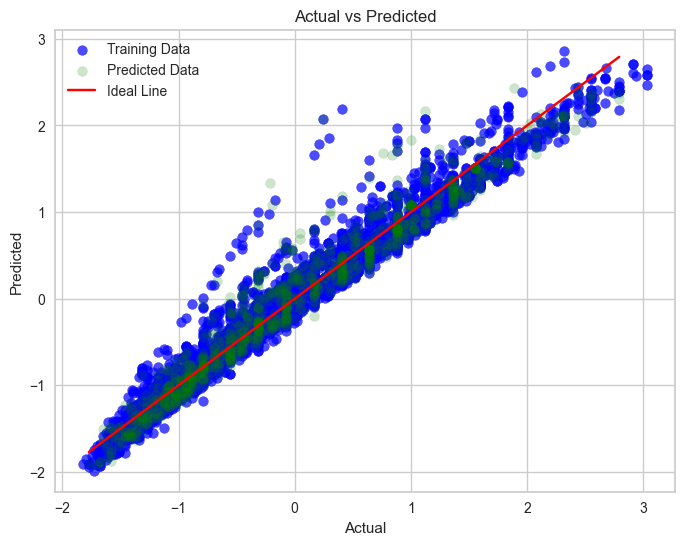

In [225]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, ridge_model_tuned.predict(X_train), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.2, label='Predicted Data')

# خط مرجع
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Ideal Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


# Lasso Regression

In [226]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد شی از کلاس Lasso
lasso_model = Lasso()
# آموزش مدل
lasso_model.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = lasso_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Show Results
print(f"Lasso MSE: {mse}")
print(f"Lasso R-Squared: {r2}")

Lasso MSE: 0.9959460608642438
Lasso R-Squared: -0.0013728927648557487


### Lasso Regression Hyperparameter Optimization

In [227]:
lasso_model = Lasso()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
opt = BayesSearchCV(
                    estimator=lasso_model,
                    search_spaces=params,
                    n_iter=20,
                    cv=5,
                    verbose=1,
                    scoring="r2")

opt.fit(X_train, y_train)

print("Bayesian Optimization : \n===============================")
print("Best parameters:", opt.best_params_)
print("Best R2 Score:", opt.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Lasso Regression Tuned
ساخت مدل جدید بر اساس هایپرپارامتر مشخص شده در سلول قبل

In [228]:
# ایجاد شی جدید با هایپرپارمتر های مشخص شده
lasso_model_tuned = Lasso(alpha=0.0001)
# آموزش مدل
lasso_model_tuned.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = lasso_model_tuned.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Show Results
print(f"Lasso MSE: {mse}")
print(f"Lasso R-Squared: {r2}")

Lasso MSE: 0.056924479298391735
Lasso R-Squared: 0.94276534368267


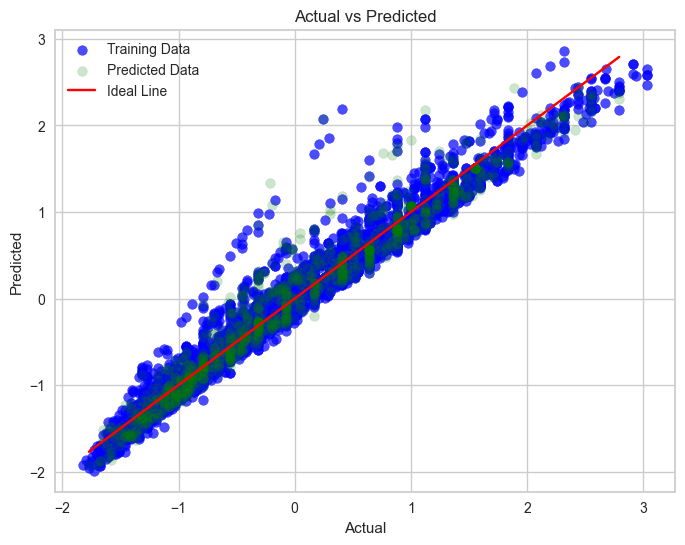

In [229]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, lasso_model_tuned.predict(X_train), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.2, label='Predicted Data')

# خط مرجع
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Ideal Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# ElasticNet Regression

In [230]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد شی از کلاس Lasso
elastic_model = ElasticNet()
# آموزش مدل
elastic_model.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = elastic_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"ElasticNet MSE: {mse}")
print(f"ElasticNet R-Squared: {r2}")


ElasticNet MSE: 0.4912400445881237
ElasticNet R-Squared: 0.5060832269728728


### ElasticNet Regression Hyperparameter Optimization

In [231]:
alphas = [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
l1_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

params_dict = [{'alpha': alpha, 'l1_ratio': l1_ratio} for alpha in alphas for l1_ratio in l1_ratios]

models = [ElasticNet(alpha=params['alpha'], l1_ratio=params['l1_ratio']) for params in params_dict]


cv_scores = [cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean() for model in models]

best_model_index = np.argmax(cv_scores)
best_model_params = params_dict[best_model_index]
print("cross_val_score : \n")
print("Best Parameters:", best_model_params)
print("Best R2 Score:", cv_scores[best_model_index])

cross_val_score : 

Best Parameters: {'alpha': 0.0001, 'l1_ratio': 0.1}
Best R2 Score: 0.9545354359709473


### ElasticNet Regression Tuned
ساخت مدل جدید بر اساس هایپرپارامتر مشخص شده در سلول قبل

In [232]:
# ایجاد شی جدید با هایپرپارمتر های مشخص شده
elastic_model_tuned = ElasticNet(alpha=0.0001, l1_ratio=0.1)

# آموزش مدل
elastic_model_tuned.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = elastic_model_tuned.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"ElasticNet MSE: {mse}")
print(f"ElasticNet R-Squared: {r2}")

ElasticNet MSE: 0.056867925709803986
ElasticNet R-Squared: 0.9428222054273223


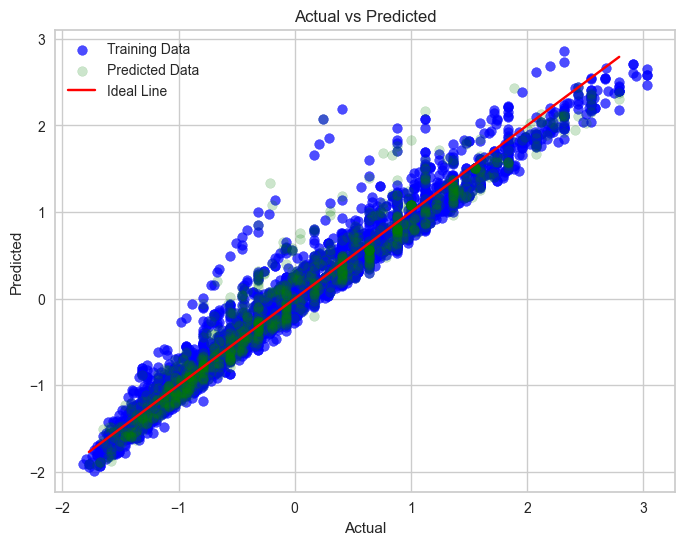

In [233]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, elastic_model_tuned.predict(X_train), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.2, label='Predicted Data')

# خط مرجع
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Ideal Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()